In [2]:
import pandas as pd
import psycopg2

## Data Extraction

In [3]:
# Create a scalable function to read identitcal datasets in pandas
def concatenated_datasets(datasets , axis= 0):
    # initialize empty list to add read datasets
    loaded = []

    #read datasets and append them to the list loaded
    for dataset in datasets:
        data = pd.read_csv(dataset)
        loaded.append(data)

    #Comcatenate identitcal datasets
    final_concatenate = pd.concat(loaded , axis=0 , sort=False)
    return final_concatenate

#Apply Function
if __name__ == '__main__':
    datasets = ['https://raw.githubusercontent.com/Ahmed9667/End-to-End-NYC-PAYROLL-data-integration-Pipeline/refs/heads/main/Data/nycpayroll_2020.csv',
                'https://raw.githubusercontent.com/Ahmed9667/End-to-End-NYC-PAYROLL-data-integration-Pipeline/refs/heads/main/Data/nycpayroll_2021.csv']
    
df =   concatenated_datasets(datasets , axis=0) 
print(df)

     FiscalYear  PayrollNumber  AgencyID                      AgencyName  \
0          2020             17    2120.0  OFFICE OF EMERGENCY MANAGEMENT   
1          2020             17    2120.0  OFFICE OF EMERGENCY MANAGEMENT   
2          2020             17    2120.0  OFFICE OF EMERGENCY MANAGEMENT   
3          2020             17    2120.0  OFFICE OF EMERGENCY MANAGEMENT   
4          2020             17    2120.0  OFFICE OF EMERGENCY MANAGEMENT   
..          ...            ...       ...                             ...   
96         2021            868       NaN     DEPT OF CITYWIDE ADMIN SVCS   
97         2021             57       NaN                 FIRE DEPARTMENT   
98         2021             56       NaN               POLICE DEPARTMENT   
99         2021             56       NaN               POLICE DEPARTMENT   
100        1999             45       NaN               POLICE DEPARTMENT   

     EmployeeID    LastName    FirstName AgencyStartDate WorkLocationBorough  \
0      

Explorartory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 100
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FiscalYear             201 non-null    int64  
 1   PayrollNumber          201 non-null    int64  
 2   AgencyID               100 non-null    float64
 3   AgencyName             201 non-null    object 
 4   EmployeeID             201 non-null    int64  
 5   LastName               201 non-null    object 
 6   FirstName              201 non-null    object 
 7   AgencyStartDate        201 non-null    object 
 8   WorkLocationBorough    201 non-null    object 
 9   TitleCode              201 non-null    int64  
 10  TitleDescription       201 non-null    object 
 11  LeaveStatusasofJune30  201 non-null    object 
 12  BaseSalary             201 non-null    float64
 13  PayBasis               201 non-null    object 
 14  RegularHours           201 non-null    float64
 15  RegularGros

In [5]:
#Check for null values
cols= []
for i in df.columns:
    cols.append(i)

types_of_data = []
for i in df.columns:
    types_of_data.append(df[i].dtypes)

num_of_nulls = []
for i in df.columns:
    num_of_nulls.append(df[i].isnull().sum())

frame_of_nulls = pd.DataFrame()
frame_of_nulls['Column'] = cols
frame_of_nulls['Type of Data'] = types_of_data
frame_of_nulls['Number of Nulls'] = num_of_nulls
frame_of_nulls


,Column,Type of Data,Number of Nulls
0,FiscalYear,int64,0
1,PayrollNumber,int64,0
2,AgencyID,float64,101
3,AgencyName,object,0
4,EmployeeID,int64,0
5,LastName,object,0
6,FirstName,object,0
7,AgencyStartDate,object,0
8,WorkLocationBorough,object,0
9,TitleCode,int64,0


In [6]:
# As we see there are two columns with null values so we have to fill them
df['AgencyID'] = df['AgencyID'].fillna(0.0)
df['AgencyCode'] = df['AgencyCode'].fillna(0.0)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

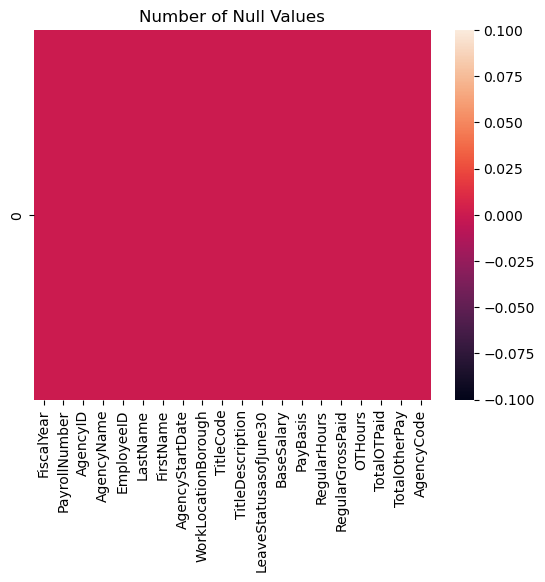

In [9]:
#Check for null values
sns.heatmap(df.isnull().sum().to_frame().T )
plt.title('Number of Null Values')
plt.show()

###### As shown Data is clean so we can go ahead

## Data Transformation

Before converting data to into Second Normal Form (2NF),we need to ensure that the dataset is in First Normal Form (1NF) and then move it to 2NF so we will check for duplicated values and determine the candidtaed primary keys columns.

In [1]:
df['FiscalYear'].value_counts()

NameError: name 'df' is not defined

In [ ]:
# We will delet columns with fiscal years 1998 and 1999 because they are irrational
df = df.drop(df[(df['FiscalYear'] == 1998) | (df['FiscalYear'] == 1999)].index)

In [ ]:
df['FiscalYear'].value_counts()

FiscalYear
2020    99
2021    99
Name: count, dtype: int64

In [ ]:
#Drop Duplicates of data frame
df = df.drop_duplicates()

In [ ]:
df

,FiscalYear,PayrollNumber,AgencyID,AgencyName,EmployeeID,LastName,FirstName,AgencyStartDate,WorkLocationBorough,TitleCode,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,AgencyCode
0,2020,17,2120.0,OFFICE OF EMERGENCY MANAGEMENT,10001,GEAGER,VERONICA,9/12/2016,BROOKLYN,40447,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,0.0
1,2020,17,2120.0,OFFICE OF EMERGENCY MANAGEMENT,149612,ROTTA,JONATHAN,9/16/2013,BROOKLYN,40447,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,0.0
2,2020,17,2120.0,OFFICE OF EMERGENCY MANAGEMENT,206583,WILSON II,ROBERT,4/30/2018,BROOKLYN,40447,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,0.0
3,2020,17,2120.0,OFFICE OF EMERGENCY MANAGEMENT,199874,WASHINGTON,MORIAH,3/18/2019,BROOKLYN,40447,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,87900.95,0.00,0.00,-3202.74,0.0
4,2020,17,2120.0,OFFICE OF EMERGENCY MANAGEMENT,58036,KRAWCZYK,AMANDA,5/15/2017,BROOKLYN,40447,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83976.54,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2021,72,0.0,DEPARTMENT OF CORRECTION,28538,GLOVER,LILWANIA,6/1/2000,QUEENS,40864,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE,128355.0,per Annum,2080.0,127452.46,1408.00,118446.72,13409.33,2017.0
95,2021,72,0.0,DEPARTMENT OF CORRECTION,164144,MASSEY-COVINGTO,DARLENE,3/4/2004,QUEENS,40864,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE,128355.0,per Annum,2080.0,127452.46,2161.00,111907.50,19537.03,2017.0
96,2021,868,0.0,DEPT OF CITYWIDE ADMIN SVCS,52830,HARDING,ARCHIBALD,5/31/2016,MANHATTAN,40782,STATIONARY ENGINEER,ACTIVE,508.8,per Day,2080.0,132288.00,901.25,90004.07,36369.10,2141.0
97,2021,57,0.0,FIRE DEPARTMENT,174178,MCGEARY,JOSEPH,8/19/1990,BROOKLYN,40207,CAPTAIN,ACTIVE,135511.0,per Annum,2080.0,146527.13,833.63,77912.32,34206.86,2012.0


In [ ]:
#Check for columns with duplicated and unique values to detect candidate primary keys
duplicates = []
for i in df.columns:
    duplicates.append(df[i].duplicated().any())

frame_of_duplicates = pd.DataFrame()
frame_of_duplicates['Column'] = list(df.columns)
frame_of_duplicates['Duplicated or Not'] = duplicates
frame_of_duplicates


,Column,Duplicated or Not
0,FiscalYear,True
1,PayrollNumber,True
2,AgencyID,True
3,AgencyName,True
4,EmployeeID,False
5,LastName,True
6,FirstName,True
7,AgencyStartDate,True
8,WorkLocationBorough,True
9,TitleCode,True


We only have column 'EmployeeID' with unique keys

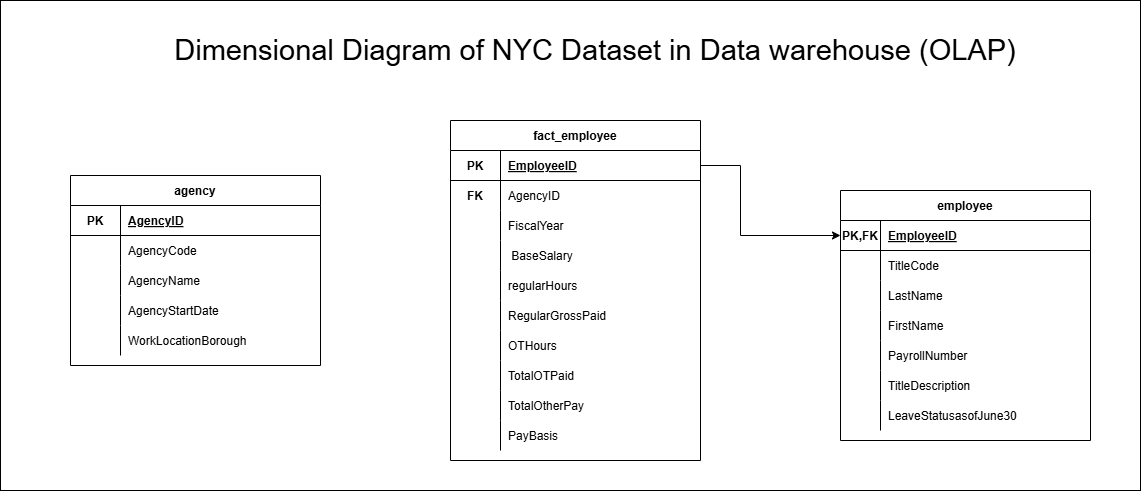

In [ ]:
df.columns

Index(['FiscalYear', 'PayrollNumber', 'AgencyID', 'AgencyName', 'EmployeeID',
       'LastName', 'FirstName', 'AgencyStartDate', 'WorkLocationBorough',
       'TitleCode', 'TitleDescription', 'LeaveStatusasofJune30', 'BaseSalary',
       'PayBasis', 'RegularHours', 'RegularGrossPaid', 'OTHours',
       'TotalOTPaid', 'TotalOtherPay', 'AgencyCode'],
      dtype='object')

In [ ]:
#create table fact_employee
fact_employee= df[['EmployeeID','AgencyID','FiscalYear','BaseSalary','RegularHours', 'RegularGrossPaid', 'OTHours',
       'TotalOTPaid', 'TotalOtherPay','PayBasis']]
fact_employee

,EmployeeID,AgencyID,FiscalYear,BaseSalary,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,PayBasis
0,10001,2120.0,2020,86005.0,1820.0,84698.21,0.00,0.00,0.00,per Annum
1,149612,2120.0,2020,86005.0,1820.0,84698.21,0.00,0.00,0.00,per Annum
2,206583,2120.0,2020,86005.0,1820.0,84698.21,0.00,0.00,0.00,per Annum
3,199874,2120.0,2020,86005.0,1820.0,87900.95,0.00,0.00,-3202.74,per Annum
4,58036,2120.0,2020,86005.0,1820.0,83976.54,0.00,0.00,0.00,per Annum
...,...,...,...,...,...,...,...,...,...,...
94,28538,0.0,2021,128355.0,2080.0,127452.46,1408.00,118446.72,13409.33,per Annum
95,164144,0.0,2021,128355.0,2080.0,127452.46,2161.00,111907.50,19537.03,per Annum
96,52830,0.0,2021,508.8,2080.0,132288.00,901.25,90004.07,36369.10,per Day
97,174178,0.0,2021,135511.0,2080.0,146527.13,833.63,77912.32,34206.86,per Annum


In [ ]:
#create agency table
agency = df[['AgencyID','AgencyCode','AgencyName','AgencyStartDate', 'WorkLocationBorough']].copy().drop_duplicates().reset_index(drop=True)
agency['AgencyStartDate'] = pd.to_datetime(agency['AgencyStartDate'])
print(agency)
print(agency.info())

     AgencyID  AgencyCode                      AgencyName AgencyStartDate  \
0      2120.0         0.0  OFFICE OF EMERGENCY MANAGEMENT      2016-09-12   
1      2120.0         0.0  OFFICE OF EMERGENCY MANAGEMENT      2013-09-16   
2      2120.0         0.0  OFFICE OF EMERGENCY MANAGEMENT      2018-04-30   
3      2120.0         0.0  OFFICE OF EMERGENCY MANAGEMENT      2019-03-18   
4      2120.0         0.0  OFFICE OF EMERGENCY MANAGEMENT      2017-05-15   
..        ...         ...                             ...             ...   
177       0.0      2017.0        DEPARTMENT OF CORRECTION      2000-06-01   
178       0.0      2017.0        DEPARTMENT OF CORRECTION      2004-03-04   
179       0.0      2141.0     DEPT OF CITYWIDE ADMIN SVCS      2016-05-31   
180       0.0      2012.0                 FIRE DEPARTMENT      1990-08-19   
181       0.0      2010.0               POLICE DEPARTMENT      1998-06-30   

    WorkLocationBorough  
0              BROOKLYN  
1              BROOKLYN

In [ ]:
#create table employee
employee = df[['EmployeeID','TitleCode','LastName', 'FirstName','PayrollNumber','TitleDescription', 'LeaveStatusasofJune30']].copy().drop_duplicates().reset_index(drop=True)
employee

,EmployeeID,TitleCode,LastName,FirstName,PayrollNumber,TitleDescription,LeaveStatusasofJune30
0,10001,40447,GEAGER,VERONICA,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
1,149612,40447,ROTTA,JONATHAN,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
2,206583,40447,WILSON II,ROBERT,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
3,199874,40447,WASHINGTON,MORIAH,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
4,58036,40447,KRAWCZYK,AMANDA,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
...,...,...,...,...,...,...,...
193,28538,40864,GLOVER,LILWANIA,72,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE
194,164144,40864,MASSEY-COVINGTO,DARLENE,72,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE
195,52830,40782,HARDING,ARCHIBALD,868,STATIONARY ENGINEER,ACTIVE
196,174178,40207,MCGEARY,JOSEPH,57,CAPTAIN,ACTIVE


## Loading Data into PostgreSQL Server

In [23]:
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os

In [24]:
'''
For security purpose we will create a virtual environment 
with parameter of postgresql server with limited access
'''
# Load the environment .env variables from the .env files
load_dotenv()
# parameters
host_db = os.getenv('host')
username_db = os.getenv ('user')
password_db = os.getenv ('password')
port_db = os.getenv ('port')
db_name = os.getenv ('name')

# Define database connection parameters including the database name
db_params = {
    'username':username_db,
    'password':password_db,
    'host':host_db,
    'port':port_db,
    'database':db_name

}

default_db_url =f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/postgres"

#create database
try:
    # open the connection
    conn = psycopg2.connect(default_db_url)
    conn.autocommit = True
    cur = conn.cursor()

#check if the database is already existed
    cur.execute(f"select 1 from pg_catalog.pg_database where datname='{db_params['database']}'")
    exists = cur.fetchone()
    if not exists:
        # Create the database
        cur.execute(f"create database {db_params['database']}")
        print(f"Database {db_params['database']} created successfully")

    else:
        print(f"Database {db_params['database']} already existed")

    # Close the cnnection
    cur.close()
    conn.close()
except exception as e :
    print(f"an error {e} occurred")


Database nyc created successfully


In [ ]:
load_dotenv()
# parameters
host_db = os.getenv('host')
username_db = os.getenv ('user')
password_db = os.getenv ('password')
port_db = os.getenv ('port')
db_name = os.getenv ('name')
# Connect to the new created database nyc
def db_connected():
    connection = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db, 
                                   port=port_db,
                                   database=db_name)

    return connection

conn = db_connected()
print(f"Database {db_params['database']} connected successfully")

Database nyc connected successfully


In [55]:
def create_tales():
    conn = db_connected()
    cursor = conn.cursor()
    query = """
                create schema if not exists payroll;

                create table payroll.agency(
                    AgencyID decimal(20,2),
                    AgencyCode decimal(20,2),
                    AgencyName varchar(255),
                    AgencyStartDate date,
                    WorkLocationBorough varchar(255));

                create table payroll.fact_employee(
                    EmployeeID int primary key,
                    AgencyID int,
                    FiscalYear int,
                    BaseSalary decimal(20,2),
                    RegularHours decimal(20,2),
                    RegularGrossPaid decimal(20,2),
                    OTHours decimal(20,2),
                    TotalOTPaid decimal(20,2),
                    TotalOtherPay decimal(20,2),
                    PayBasis varchar(255)
                );
                

                create table payroll.employee(
                    EmployeeID int primary key,
                    TitleCode int,
                    LastName varchar(255),
                    FirstName varchar(255),
                    PayrollNumber int,
                    TitleDescription varchar(255),
                    LeaveStatusasofJune30 varchar(255),
                    foreign key (EmployeeID) references payroll.fact_employee(EmployeeID)
                );
                    
            """
    cursor.execute(query)
    conn.commit()
    cursor.close()
    conn.close()

create_tales()
print('Schema and tables created successfully')


Schema and tables created successfully


Showing Schema in DataWarehouse

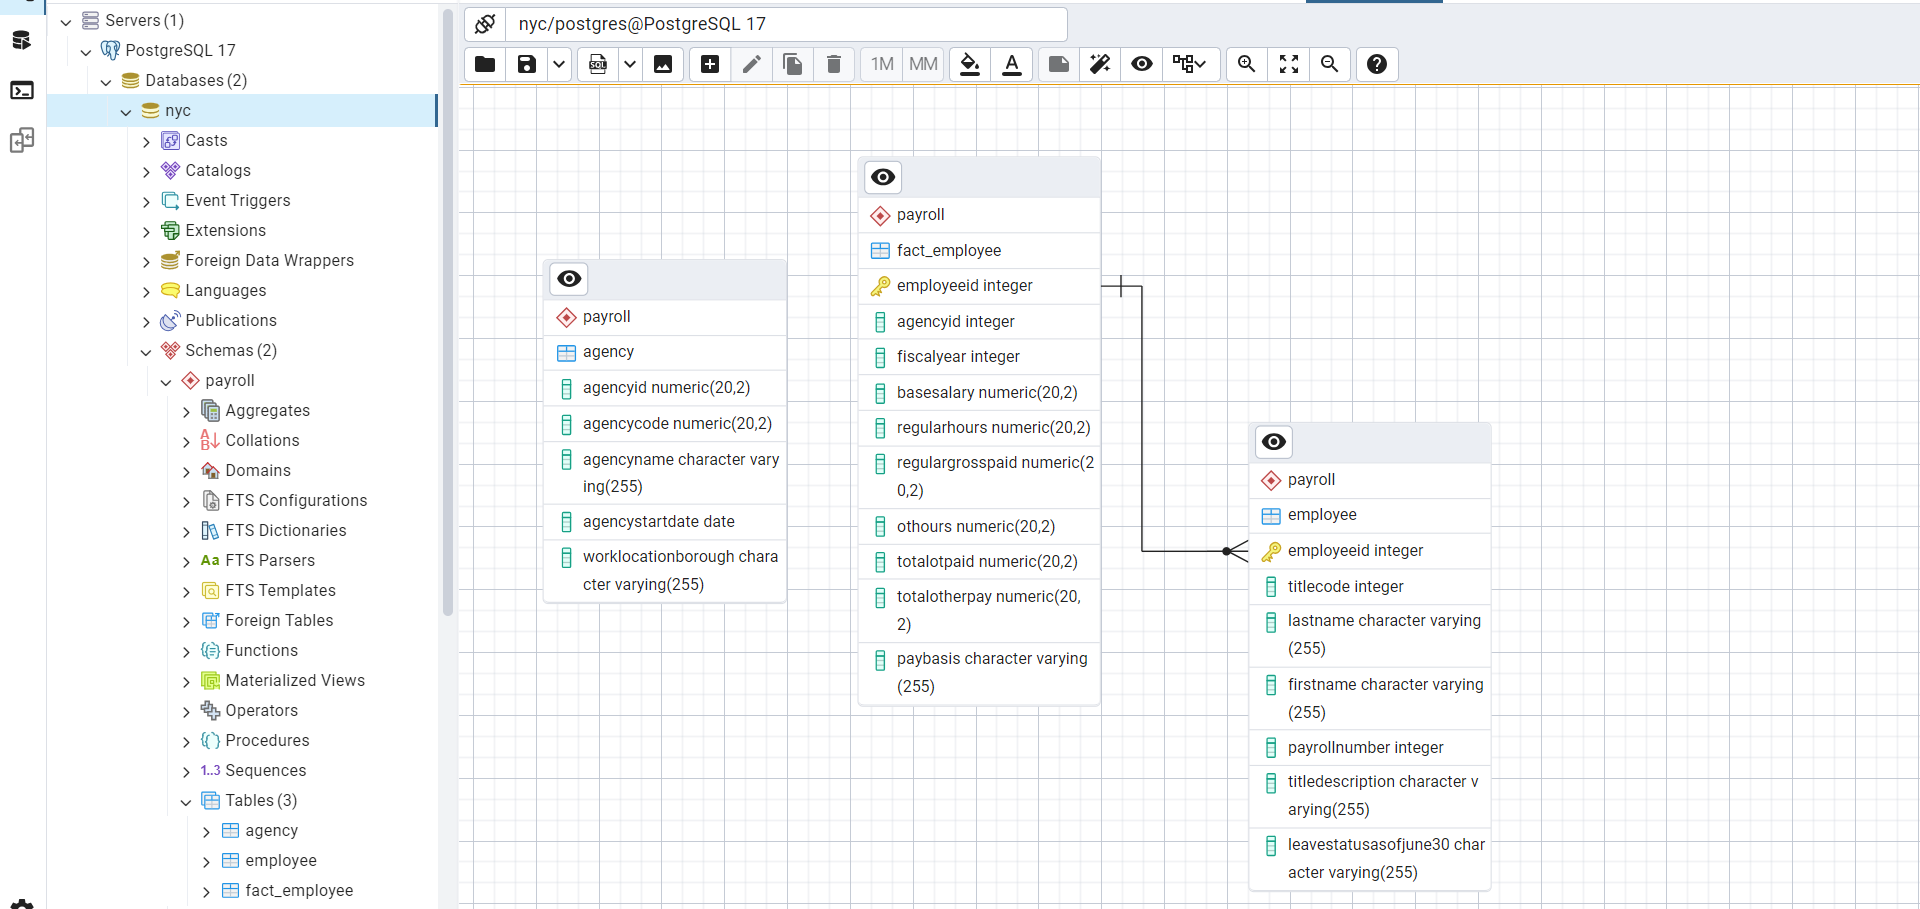

##### Insert Records

In [ ]:
def load_records(df):
    conn = db_connected()
    cursor = conn.cursor()

    for index, row in df.iterrows():
        try:
            cursor.execute("""
                INSERT INTO payroll.agency (AgencyID, AgencyCode,AgencyName, AgencyStartDate,WorkLocationBorough) 
                VALUES (%s, %s, %s, %s,%s);
            """, (row['AgencyID'], row['AgencyCode'], row['AgencyName'], row['AgencyStartDate'],row['WorkLocationBorough']))
        except psycopg2.IntegrityError:
            conn.rollback()  # Rollback on error (duplicate keys or constraint violations)
        else:
            conn.commit()  # Commit after each successful insert

    cursor.close()
    conn.close()


load_records(agency)
print('Records added successfully')

Records added successfully


In [ ]:
def load_records(df):
    conn = db_connected()
    cursor = conn.cursor()

    for index, row in df.iterrows():
        try:
            cursor.execute("""
                INSERT INTO payroll.fact_employee (EmployeeID, AgencyID, FiscalYear, BaseSalary, RegularHours, RegularGrossPaid, OTHours, TotalOTPaid, TotalOtherPay, PayBasis) 
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
            """, (row['EmployeeID'], row['AgencyID'], row['FiscalYear'], row['BaseSalary'], row['RegularHours'], row['RegularGrossPaid'], row['OTHours'], row['TotalOTPaid'], row['TotalOtherPay'], row['PayBasis']))
        except psycopg2.IntegrityError:
            conn.rollback()  
        else:
            conn.commit()  

    cursor.close()
    conn.close()


load_records(fact_employee)
print('Records added successfully')


Records added successfully


In [ ]:
def load_records(df):
    conn = db_connected()
    cursor = conn.cursor()

    for index, row in df.iterrows():
        try:
            cursor.execute("""
                INSERT INTO payroll.employee (EmployeeID , TitleCode ,LastName, FirstName,PayrollNumber,TitleDescription,LeaveStatusasofJune30) 
                VALUES (%s, %s, %s, %s,%s,%s,%s);
            """, (row['EmployeeID'], row['TitleCode'], row['LastName'], row['FirstName'],row['PayrollNumber'],row['TitleDescription'],row['LeaveStatusasofJune30']))
        except psycopg2.IntegrityError:
            conn.rollback()  
        else:
            conn.commit()  

    cursor.close()
    conn.close()


load_records(employee)
print('Records added successfully')

Records added successfully


In [69]:
#Check for the inserted records

# let us use library database
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select * from payroll.agency"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,agencyid,agencycode,agencyname,agencystartdate,worklocationborough
0,2120.00,0.00,OFFICE OF EMERGENCY MANAGEMENT,2016-09-12,BROOKLYN
1,2120.00,0.00,OFFICE OF EMERGENCY MANAGEMENT,2013-09-16,BROOKLYN
2,2120.00,0.00,OFFICE OF EMERGENCY MANAGEMENT,2018-04-30,BROOKLYN
3,2120.00,0.00,OFFICE OF EMERGENCY MANAGEMENT,2019-03-18,BROOKLYN
4,2120.00,0.00,OFFICE OF EMERGENCY MANAGEMENT,2017-05-15,BROOKLYN
...,...,...,...,...,...
177,0.00,2017.00,DEPARTMENT OF CORRECTION,2000-06-01,QUEENS
178,0.00,2017.00,DEPARTMENT OF CORRECTION,2004-03-04,QUEENS
179,0.00,2141.00,DEPT OF CITYWIDE ADMIN SVCS,2016-05-31,MANHATTAN
180,0.00,2012.00,FIRE DEPARTMENT,1990-08-19,BROOKLYN


In [70]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select * from payroll.fact_employee"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,employeeid,agencyid,fiscalyear,basesalary,regularhours,regulargrosspaid,othours,totalotpaid,totalotherpay,paybasis
0,10001,2120,2020,86005.00,1820.00,84698.21,0.00,0.00,0.00,per Annum
1,149612,2120,2020,86005.00,1820.00,84698.21,0.00,0.00,0.00,per Annum
2,206583,2120,2020,86005.00,1820.00,84698.21,0.00,0.00,0.00,per Annum
3,199874,2120,2020,86005.00,1820.00,87900.95,0.00,0.00,-3202.74,per Annum
4,58036,2120,2020,86005.00,1820.00,83976.54,0.00,0.00,0.00,per Annum
...,...,...,...,...,...,...,...,...,...,...
193,28538,0,2021,128355.00,2080.00,127452.46,1408.00,118446.72,13409.33,per Annum
194,164144,0,2021,128355.00,2080.00,127452.46,2161.00,111907.50,19537.03,per Annum
195,52830,0,2021,508.80,2080.00,132288.00,901.25,90004.07,36369.10,per Day
196,174178,0,2021,135511.00,2080.00,146527.13,833.63,77912.32,34206.86,per Annum


In [71]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select * from payroll.employee"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,employeeid,titlecode,lastname,firstname,payrollnumber,titledescription,leavestatusasofjune30
0,10001,40447,GEAGER,VERONICA,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
1,149612,40447,ROTTA,JONATHAN,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
2,206583,40447,WILSON II,ROBERT,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
3,199874,40447,WASHINGTON,MORIAH,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
4,58036,40447,KRAWCZYK,AMANDA,17,EMERGENCY PREPAREDNESS MANAGER,ACTIVE
...,...,...,...,...,...,...,...
193,28538,40864,GLOVER,LILWANIA,72,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE
194,164144,40864,MASSEY-COVINGTO,DARLENE,72,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE
195,52830,40782,HARDING,ARCHIBALD,868,STATIONARY ENGINEER,ACTIVE
196,174178,40207,MCGEARY,JOSEPH,57,CAPTAIN,ACTIVE


###### We checked that our tables are fully complete

### Data Visualization

We will execute SQL queries to gain insights from recorded data in data warehouse

In [82]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select AgencyName , count(EmployeeID) as number_of_eployees 
from payroll.agency
inner join payroll.fact_employee
on agency.AgencyID = fact_employee.AgencyID
group by AgencyName
order by number_of_eployees desc"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,agencyname,number_of_eployees
0,OFFICE OF EMERGENCY MANAGEMENT,6438
1,DEPT OF HEALTH/MENTAL HYGIENE,2871
2,DEPARTMENT OF CORRECTION,1089
3,DEPARTMENT OF SANITATION,1089
4,FIRE DEPARTMENT,891
5,NYC HOUSING AUTHORITY,792
6,DEPT OF CITYWIDE ADMIN SVCS,693
7,DEPT OF ENVIRONMENT PROTECTION,297
8,OFFICE OF THE COMPTROLLER,297
9,POLICE DEPARTMENT,198


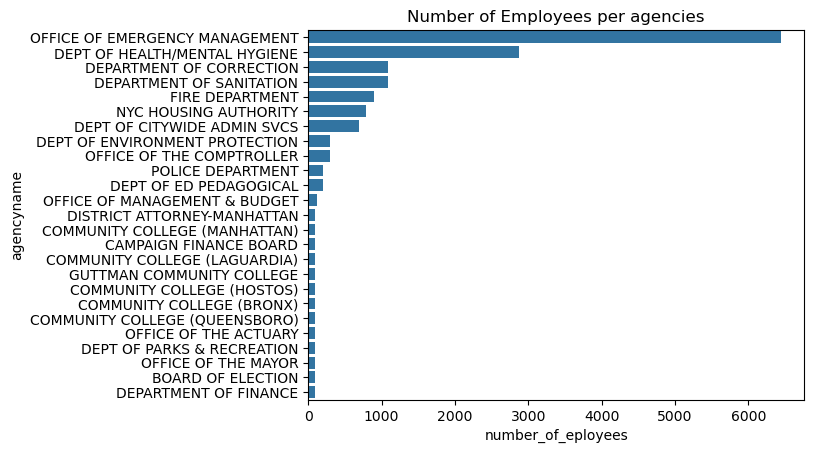

In [83]:

sns.barplot(x=temp['number_of_eployees'],y=temp['agencyname'] )
plt.title('Number of Employees per agencies')
plt.show()

Office of Emergency management has the highest number of employees

In [85]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select WorkLocationBorough , count(EmployeeID) as number_of_eployees 
from payroll.agency
inner join payroll.fact_employee
on agency.AgencyID = fact_employee.AgencyID
group by WorkLocationBorough
order by number_of_eployees desc"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,worklocationborough,number_of_eployees
0,BROOKLYN,7824
1,MANHATTAN,4080
2,QUEENS,2970
3,BRONX,891
4,RICHMOND,396
5,OTHER,99


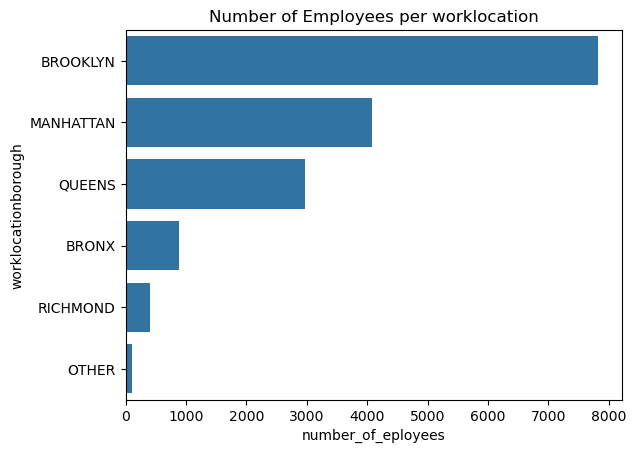

In [86]:

sns.barplot(x=temp['number_of_eployees'],y=temp['worklocationborough'] )
plt.title('Number of Employees per worklocation')
plt.show()

Brooklyn has the highest number of employees and so agencies while Richmond is the least recorded one

In [91]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select extract(month from AgencyStartDate) as Month , count(*) as frequency 
from payroll.agency
group by Month
order by frequency desc 
"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,month,frequency
0,7,22
1,1,20
2,9,20
3,8,19
4,6,17
5,4,14
6,10,14
7,5,13
8,11,12
9,2,11


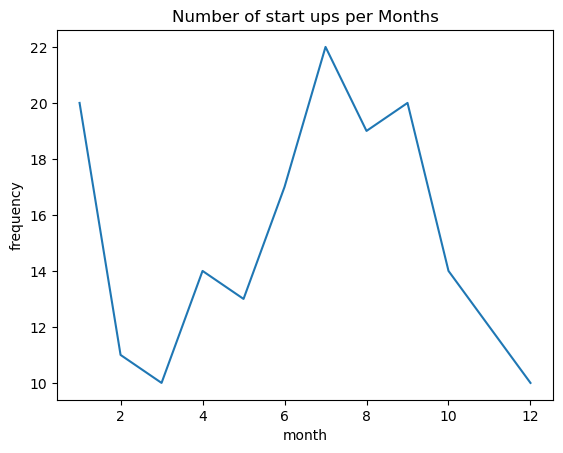

In [97]:
sns.lineplot(x= temp['month'], y =temp['frequency'] )
plt.title('Number of start ups per Months')
plt.show()

July witnessed the highest number of start up agencies that means more jobs and employees while March and December were the lowest with recesiion

In [98]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """select extract(year from AgencyStartDate) as year , count(*) as frequency 
from payroll.agency
group by year
order by frequency desc 
"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,year,frequency
0,2019,23
1,2017,20
2,2018,19
3,2015,11
4,2016,10
5,2020,9
6,2014,7
7,2004,7
8,2013,7
9,2005,6


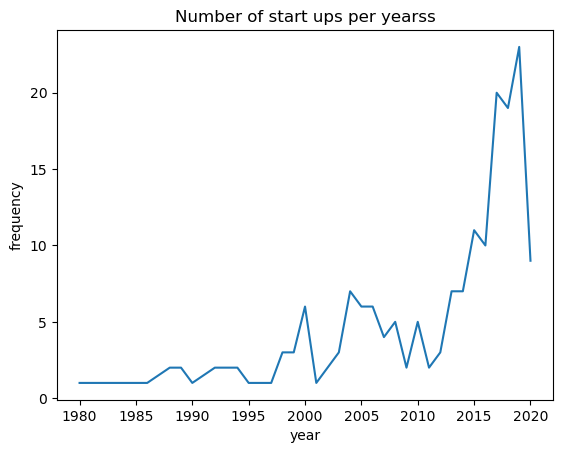

In [100]:
sns.lineplot(x= temp['year'], y =temp['frequency'] )
plt.title('Number of start ups per yearss')
plt.show()

2019 witnessed the highest number of start ups in New York City while the 90s and below where the lowest

In [106]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """ select  FirstName , LastName ,TitleDescription , LeaveStatusasofJune30 , sum(TotalOTPaid) as total_paid_salary
from payroll.employee inner join payroll.fact_employee
on employee.EmployeeID = fact_employee.EmployeeID
group by FirstName,LastName ,TitleDescription , LeaveStatusasofJune30
order by total_paid_salary desc
"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,firstname,lastname,titledescription,leavestatusasofjune30,total_paid_salary
0,PATRICK,PETTIT,STATIONARY ENGINEER,ACTIVE,218694.96
1,PATRICK,HALLAHAN,STATIONARY ENGINEER,ACTIVE,218628.18
2,GARFIELD,DALEY,SUPERVISOR ELECTRICIAN,ACTIVE,200038.56
3,THOMAS,CARDINALE,PLUMBER,ACTIVE,195850.91
4,STEPHEN,TELEHANY,STATIONARY ENGINEER,ACTIVE,192296.19
...,...,...,...,...,...
193,SHERRY,CHAN,CHIEF ACTUARY,ACTIVE,0.00
194,BRANCH,STRICKLAND,EMERGENCY PREPAREDNESS MANAGER,CEASED,0.00
195,AMANDA,KRAWCZYK,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,0.00
196,JOSEPH,ESPOSITO,COMMISSIONER OF EMERGENCY MANAGEMENT,CEASED,0.00


In [112]:
temp['full_name'] = temp['firstname'] +' '+ temp['lastname']
temp.head(2)

,firstname,lastname,titledescription,leavestatusasofjune30,total_paid_salary,full_name
0,PATRICK,PETTIT,STATIONARY ENGINEER,ACTIVE,218694.96,PATRICK PETTIT
1,PATRICK,HALLAHAN,STATIONARY ENGINEER,ACTIVE,218628.18,PATRICK HALLAHAN


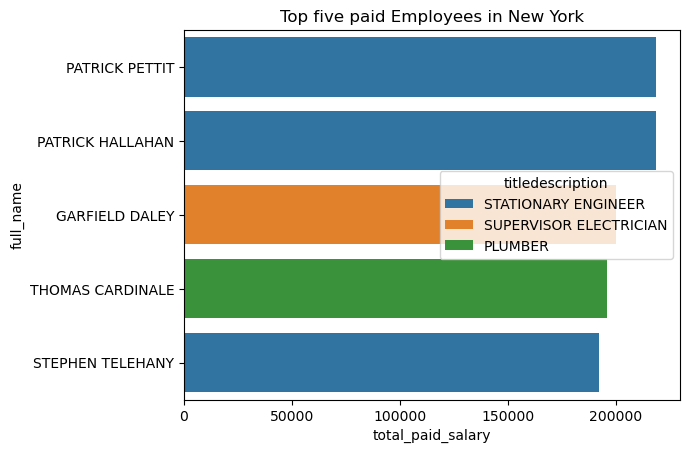

In [114]:
temp_top = temp[:5]
sns.barplot(x= temp_top['total_paid_salary'], y =temp_top['full_name'], hue=temp_top['titledescription'] )
plt.title('Top five paid Employees in New York')
plt.show()

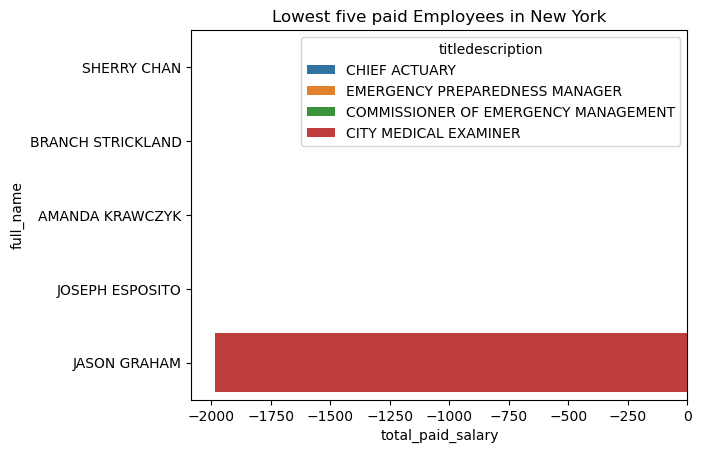

In [116]:
temp_top = temp[-5:]
sns.barplot(x= temp_top['total_paid_salary'], y =temp_top['full_name'], hue=temp_top['titledescription'] )
plt.title('Lowest five paid Employees in New York')
plt.show()

From above we conclude the following:
- Patrick Pettit is the highest paid employee in New York
- Jason Graham is the lowest recorded eone in New York
- Stationary Engineer is a high on demand job in USA with welfared income
- Medical Examination sector has the worst and lowest income jobs

In [125]:
con = psycopg2.connect(user=username_db, 
                                   host=host_db,  
                                   password=password_db,  
                                   port=port_db,
                                   database=db_name)
cur = con.cursor()
query = """ select  TitleDescription , LeaveStatusasofJune30 , sum(RegularHours) as total_Working_hours ,
sum(TotalOTPaid) as total_paid_salary
from payroll.employee inner join payroll.fact_employee
on employee.EmployeeID = fact_employee.EmployeeID
group by TitleDescription , LeaveStatusasofJune30
order by total_working_hours desc
"""
cur.execute(query)
result = cur.fetchall()
temp = pd.DataFrame(result , columns = [i[0] for i in cur.description])
temp

,titledescription,leavestatusasofjune30,total_working_hours,total_paid_salary
0,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,58767.25,299050.69
1,STATIONARY ENGINEER,ACTIVE,47840.00,3061242.76
2,CITY MEDICAL EXAMINER,ACTIVE,24960.00,114548.96
3,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,20894.50,768.28
4,SUPERVISOR,ACTIVE,20800.00,1525379.89
5,BUDGET ANALYST,ACTIVE,10920.00,0.00
6,OILER,ACTIVE,8320.00,504511.15
7,CAPTAIN,ACTIVE,8320.00,320430.08
8,EMERGENCY PREPAREDNESS SPECIALIST,CEASED,7864.25,14513.37
9,CITY MEDICAL SPECIALIST,ACTIVE,7600.00,306362.01


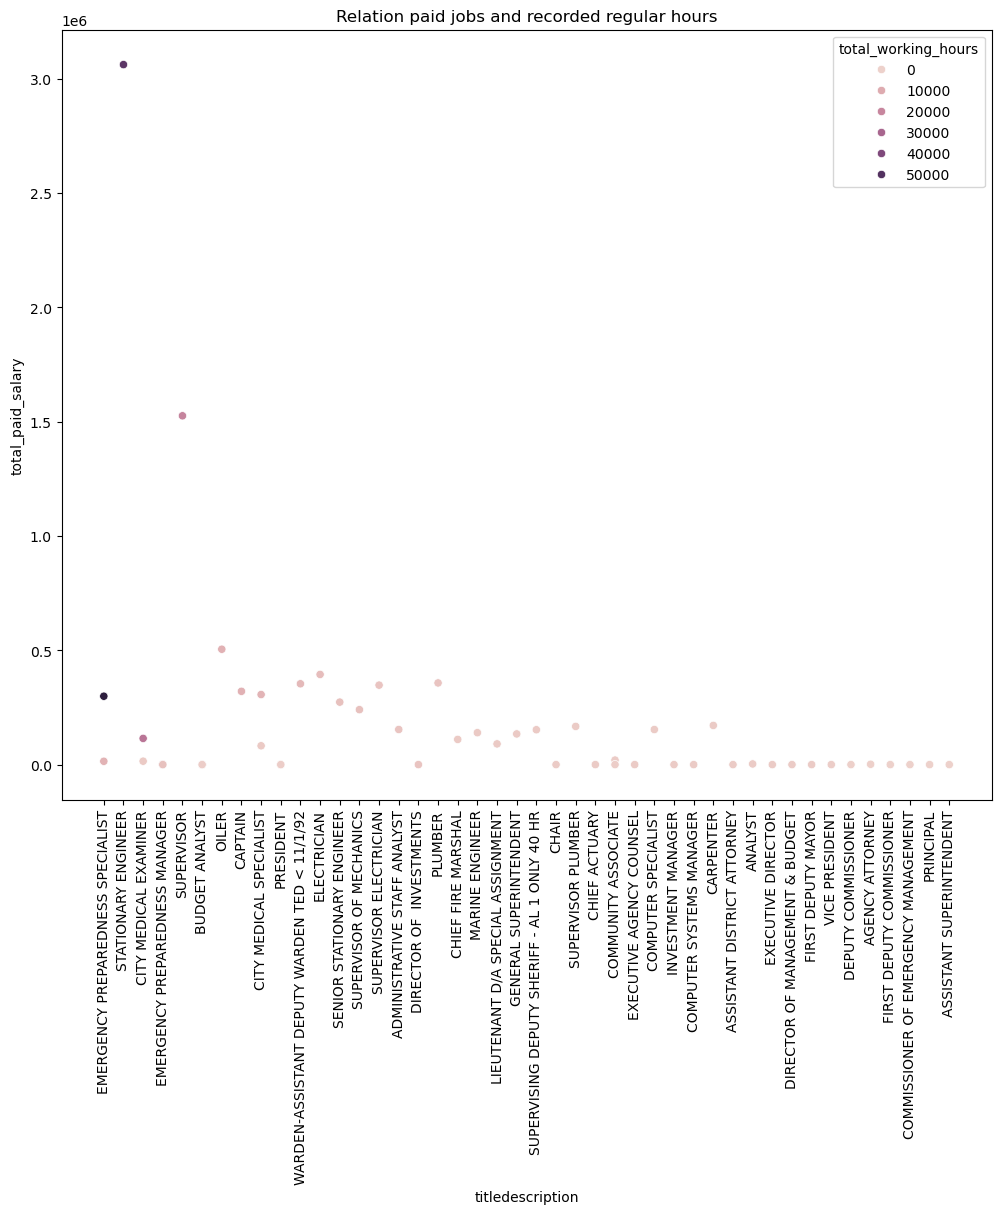

In [129]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=temp['titledescription'] , y=temp['total_paid_salary'],hue=temp['total_working_hours'])
plt.title('Relation paid jobs and recorded regular hours')
plt.xticks(rotation=90)
plt.show()


EMERGENCY PREPAREDNESS SPECIALIST socred the highest paid salary with a correlated high number of working hours while most of jobs' income is positively correlated with the working hours as the lower scored hours are, the lower income is.